## Classification

In [11]:
!pip install pycaret
!pip install openpyxl
import matplotlib.pyplot as plt
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\PERSONAL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\PERSONAL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
pip install pycaret[analysis]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\PERSONAL\Documents\Analítica II\Taller_2_Grupal\pythonProject1\.venv\Scripts\python.exe -m pip install --upgrade pip


In [13]:
pip install pycaret[full]

  Obtaining dependency information for kmodes>=0.11.1 from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata
  Using cached kmodes-0.12.2-py2.py3-none-any.whl.metadata (8.1 kB)
  Obtaining dependency information for mlxtend>=0.19.0 from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
  Obtaining dependency information for statsforecast<1.6.0,>=0.5.5 from https://files.pythonhosted.org/packages/ff/a1/7140ebf2bb1c513275d13a63b4718f531f5e0f285bb92e0d954009ad41ef/statsforecast-1.5.0-py3-none-any.whl.metadata
  Using cached statsforecast-1.5.0-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for hyperopt>=0.2.7 from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\PERSONAL\Documents\Analítica II\Taller_2_Grupal\pythonProject1\.venv\Scripts\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
data = pd.read_excel('bank_churn.xlsx')


In [15]:
data = data.drop(columns = 'clientnum')

In [16]:
from pycaret.classification import *
s = setup(data, target = 'attrition_flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,attrition_flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 20)"
5,Transformed data shape,"(10127, 37)"
6,Transformed train set shape,"(7088, 37)"
7,Transformed test set shape,"(3039, 37)"
8,Numeric features,14
9,Categorical features,5


In [17]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'attrition_flag', session_id = 123)


,Description,Value
0,Session id,123
1,Target,attrition_flag
2,Target type,Binary
3,Target mapping,"Attrited Customer: 0, Existing Customer: 1"
4,Original data shape,"(10127, 20)"
5,Transformed data shape,"(10127, 37)"
6,Transformed train set shape,"(7088, 37)"
7,Transformed test set shape,"(3039, 37)"
8,Numeric features,14
9,Categorical features,5


## Compare Models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [18]:
# functional API
best = compare_models()

# OOP API
best = s.compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:42:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9714,0.9929,0.9714,0.9711,0.9710,0.8912,0.8920,0.2450
gbc,Gradient Boosting Classifier,0.9639,0.9889,0.9639,0.9635,0.9630,0.8597,0.8622,0.3740
rf,Random Forest Classifier,0.9547,0.9851,0.9547,0.9540,0.9531,0.8205,0.8250,0.2290
ada,Ada Boost Classifier,0.9540,0.9809,0.9540,0.9532,0.9533,0.8243,0.8254,0.1400
dt,Decision Tree Classifier,0.9340,0.8787,0.9340,0.9342,0.9340,0.7556,0.7559,0.0660
et,Extra Trees Classifier,0.9299,0.9749,0.9299,0.9297,0.9238,0.6985,0.7186,0.1790
lda,Linear Discriminant Analysis,0.9017,0.9209,0.9017,0.8962,0.8971,0.6032,0.6091,0.0520
qda,Quadratic Discriminant Analysis,0.8976,0.9148,0.8976,0.8940,0.8940,0.5960,0.6014,0.0570
ridge,Ridge Classifier,0.8953,0.9209,0.8953,0.8896,0.8821,0.5245,0.5565,0.0500
nb,Naive Bayes,0.8932,0.8732,0.8932,0.8887,0.8901,0.5817,0.5845,0.0530


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:44:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9714,0.9929,0.9714,0.9711,0.9710,0.8912,0.8920,0.2440
gbc,Gradient Boosting Classifier,0.9639,0.9889,0.9639,0.9635,0.9630,0.8597,0.8622,0.3810
rf,Random Forest Classifier,0.9547,0.9851,0.9547,0.9540,0.9531,0.8205,0.8250,0.2370
ada,Ada Boost Classifier,0.9540,0.9809,0.9540,0.9532,0.9533,0.8243,0.8254,0.1470
dt,Decision Tree Classifier,0.9340,0.8787,0.9340,0.9342,0.9340,0.7556,0.7559,0.0590
et,Extra Trees Classifier,0.9299,0.9749,0.9299,0.9297,0.9238,0.6985,0.7186,0.1850
lda,Linear Discriminant Analysis,0.9017,0.9209,0.9017,0.8962,0.8971,0.6032,0.6091,0.0580
qda,Quadratic Discriminant Analysis,0.8976,0.9148,0.8976,0.8940,0.8940,0.5960,0.6014,0.0740
ridge,Ridge Classifier,0.8953,0.9209,0.8953,0.8896,0.8821,0.5245,0.5565,0.0550
nb,Naive Bayes,0.8932,0.8732,0.8932,0.8887,0.8901,0.5817,0.5845,0.0560


In [19]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## Analyze Model
This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [20]:
# functional API
evaluate_model(best)

# OOP API
s.evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

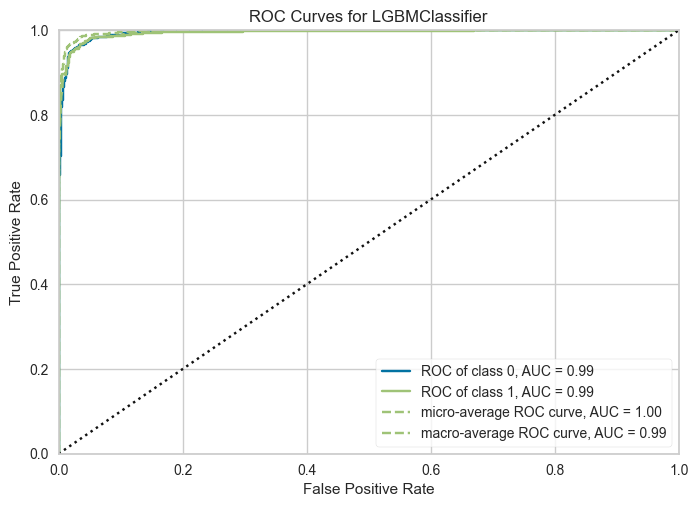

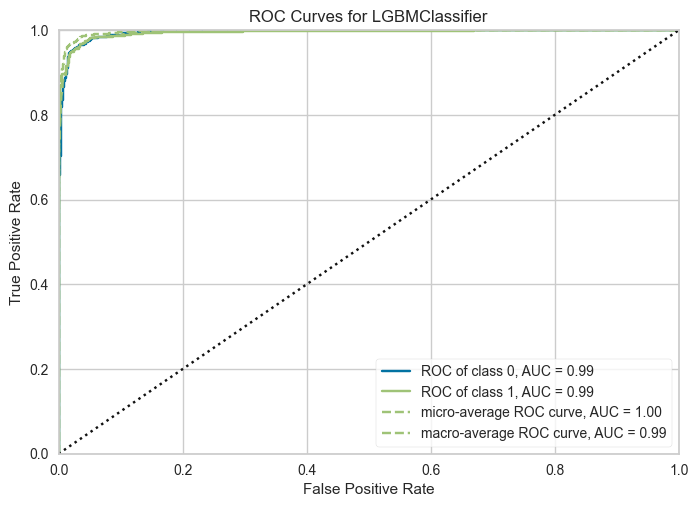

In [21]:
# functional API
plot_model(best, plot = 'auc')

# OOP API
s.plot_model(best, plot = 'auc')


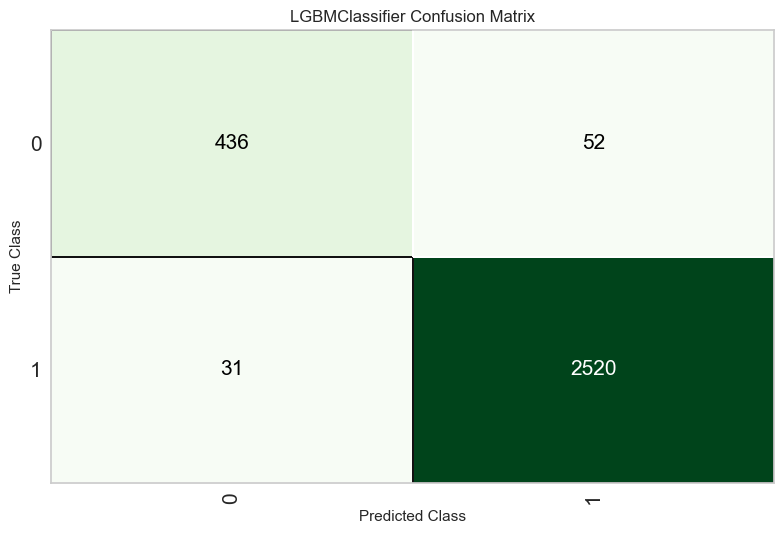

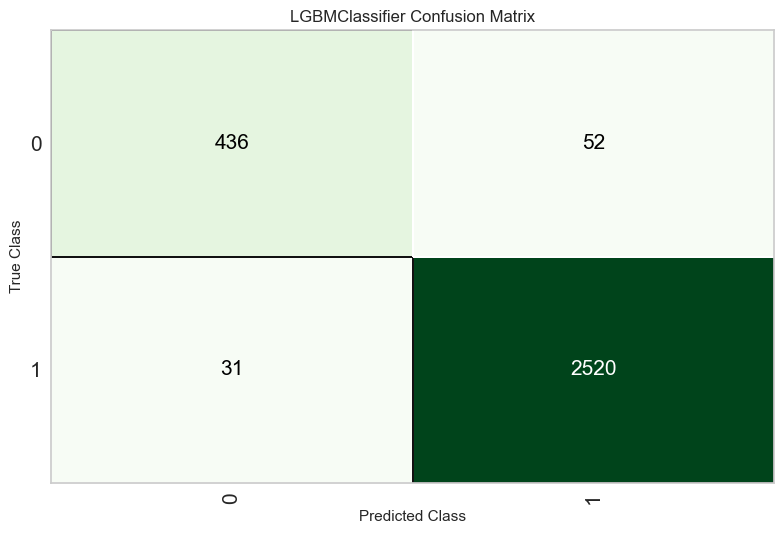

In [22]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# OOP API
s.plot_model(best, plot = 'confusion_matrix')


## Predictions
This function scores the data and returns prediction_label and prediction_score probability of the predicted class). When data is None, it predicts label and score on the test set (created during the setup function).

In [23]:
# functional API
predict_model(best)

# OOP API
s.predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9727,0.9946,0.9727,0.9724,0.9724,0.8969,0.8972


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9727,0.9946,0.9727,0.9724,0.9724,0.8969,0.8972


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,...,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,prediction_label,prediction_score
3795,43,F,1,Graduate,Single,Less than $40K,Blue,36,2,3,...,0,2886.0,0.587,2326,50,0.429,0.000,Attrited Customer,Attrited Customer,0.9914
8805,47,M,3,Unknown,Single,$120K +,Gold,38,2,4,...,1342,33174.0,0.690,7283,89,0.648,0.039,Existing Customer,Existing Customer,0.9994
8317,48,F,3,Unknown,Married,$40K - $60K,Blue,36,1,6,...,1057,1747.0,0.576,5033,81,0.800,0.377,Existing Customer,Existing Customer,0.9996
7171,49,F,2,Post-Graduate,Married,Less than $40K,Blue,44,4,4,...,0,1644.0,1.033,4898,82,0.783,0.000,Existing Customer,Existing Customer,0.9979
9098,42,M,3,Unknown,Married,Less than $40K,Silver,31,1,1,...,0,14630.0,0.752,8217,99,0.650,0.000,Existing Customer,Existing Customer,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,58,F,2,Graduate,Single,$40K - $60K,Blue,50,4,3,...,0,5386.0,0.777,4846,84,0.680,0.000,Existing Customer,Existing Customer,0.9984
8830,40,F,3,College,Single,$40K - $60K,Silver,28,2,1,...,1873,20488.0,0.701,7586,94,0.567,0.084,Existing Customer,Existing Customer,0.9999
336,56,F,1,Graduate,Married,Less than $40K,Blue,38,4,3,...,2462,116.0,1.707,1378,29,0.812,0.955,Existing Customer,Existing Customer,0.9989
9397,51,M,1,Graduate,Married,$120K +,Gold,37,2,3,...,2417,32099.0,0.947,13021,117,0.625,0.070,Existing Customer,Existing Customer,0.9986


In [24]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9918,0.9989,0.9918,0.9918,0.9918,0.9695,0.9695


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9918,0.9989,0.9918,0.9918,0.9918,0.9695,0.9695


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,...,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,prediction_label,prediction_score
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer,Existing Customer,0.9995
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer,Existing Customer,0.9996
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer,Existing Customer,0.9993
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer,Existing Customer,0.9974
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer,Existing Customer,0.9672


In [25]:
# functional API
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

# OOP API
predictions = s.predict_model(best, data=data, raw_score=True)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9918,0.9989,0.9918,0.9918,0.9918,0.9695,0.9695


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9918,0.9989,0.9918,0.9918,0.9918,0.9695,0.9695


,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,...,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,prediction_label,prediction_score_Attrited Customer,prediction_score_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,11914.0,1.335,1144,42,1.625,0.061,Existing Customer,Existing Customer,0.0005,0.9995
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,7392.0,1.541,1291,33,3.714,0.105,Existing Customer,Existing Customer,0.0004,0.9996
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,3418.0,2.594,1887,20,2.333,0.000,Existing Customer,Existing Customer,0.0007,0.9993
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,796.0,1.405,1171,20,2.333,0.760,Existing Customer,Existing Customer,0.0026,0.9974
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,4716.0,2.175,816,28,2.500,0.000,Existing Customer,Existing Customer,0.0328,0.9672


## Save the model

In [26]:
# functional API
save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['customer_age', 'dependent_count',
                                              'months_on_book',
                                              'total_relationship_count',
                                              'months_inactive_12_mon',
                                              'contacts_count_12_mon',
                                              'credit_limit'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 m

In [27]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

# OOP API
loaded_model = s.load_model('my_best_pipeline')
print(loaded_model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\PERSONAL\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['customer_age', 'dependent_count',
                                             'months_on_book',
                                             'total_relationship_count',
                                             'months_inactive_12_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
         